In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-cleaned-europe-dataset/Aemf1.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import set_config
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
set_config(transform_output="pandas")
os.chdir('/kaggle/input/airbnb-cleaned-europe-dataset')
df = pd.read_csv('Aemf1.csv')
df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

<Axes: >

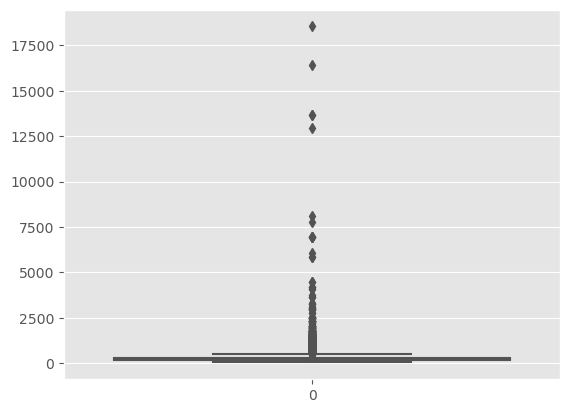

In [4]:
sns.boxplot(df['Price'])

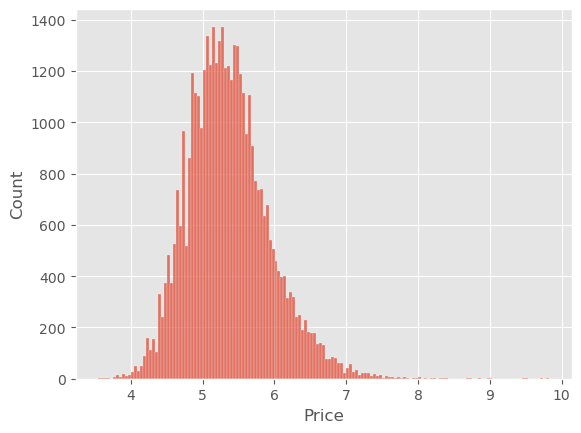

In [5]:
sns.histplot(np.log(df['Price']))
plt.show()

In [6]:
df.sort_values('Price', ascending=False).head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
3590,Athens,18545.450285,Weekday,Entire home/apt,False,False,2.0,True,0,1,10.0,100.0,1,1.196536,0.381128,134.904353,5.086455,275.573716,20.691752
24810,Paris,16445.614689,Weekday,Entire home/apt,False,False,2.0,False,0,0,9.0,100.0,1,4.602378,0.118665,260.896109,12.700335,545.826245,32.072497
38387,Vienna,13664.305916,Weekday,Private room,False,True,2.0,False,0,0,9.0,87.0,1,2.239501,0.414395,128.349070,9.191812,201.545043,4.818080
40794,Vienna,13656.358834,Weekend,Private room,False,True,2.0,False,0,0,9.0,87.0,1,2.239486,0.414409,128.349821,9.191567,201.546533,4.871302
38222,Vienna,12942.991375,Weekday,Entire home/apt,False,False,4.0,False,0,1,7.0,93.0,1,1.497979,0.396893,123.776241,8.864325,196.019793,4.685995


In [7]:
col_outlier = ['Price', 'City Center (km)', 'Metro Distance (km)', 
               'Attraction Index', 'Normalised Attraction Index', 
               'Restraunt Index', 'Normalised Restraunt Index']

In [8]:
for col in col_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    limit_low = Q1 - IQR * 1.7
    limit_high = Q3 + IQR * 1.7
    
    df = df[(df[col] >= limit_low) & (df[col] <= limit_high)]

In [9]:
df.sort_values('Price', ascending=False).head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
26368,Paris,557.367881,Weekend,Entire home/apt,False,False,4.0,False,1,0,9.0,88.0,1,1.581036,0.449341,327.647257,15.931872,818.905915,37.778039
26387,Paris,557.367881,Weekend,Entire home/apt,False,False,4.0,False,1,0,10.0,100.0,1,1.397891,0.268974,347.725017,16.908154,855.394598,39.461347
9193,Barcelona,557.171783,Weekend,Private room,False,True,3.0,False,1,0,9.0,94.0,1,0.783441,0.214104,538.246579,20.782322,1067.418762,23.447604
39056,Vienna,556.763200,Weekday,Entire home/apt,False,False,6.0,True,1,0,10.0,98.0,2,2.091751,0.943280,163.184925,11.686607,169.272470,4.046581
40628,Vienna,556.763200,Weekend,Entire home/apt,False,False,6.0,True,1,0,10.0,98.0,2,2.091743,0.943276,163.187101,11.686383,169.273166,4.091267


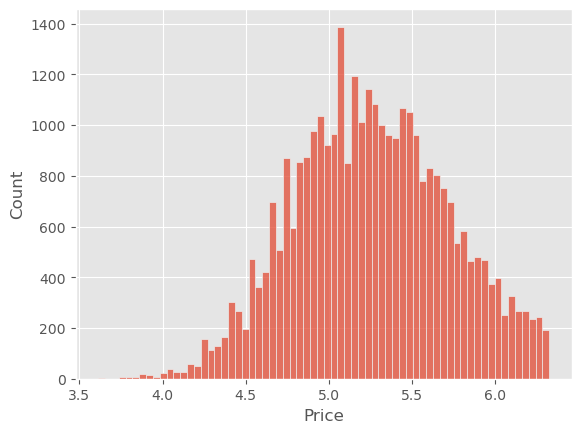

In [10]:
sns.histplot(np.log(df['Price']))
plt.show()

Text(0.5, 1.0, 'City Count')

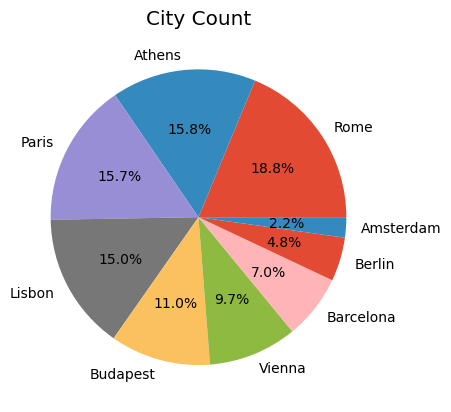

In [11]:
city_counts = df['City'].value_counts()
plt.pie(city_counts, labels = city_counts.index, autopct='%1.1f%%')
plt.title('City Count')

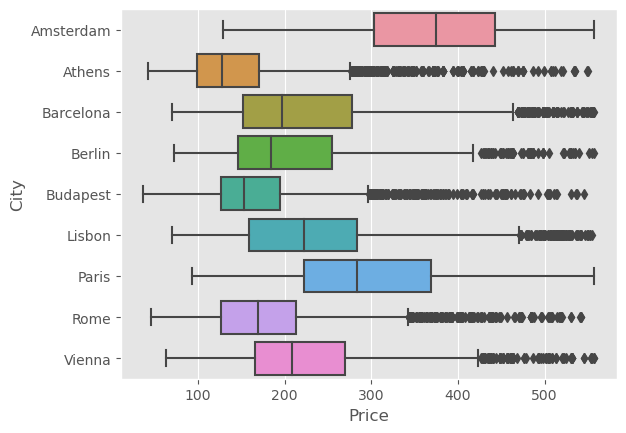

In [12]:
sns.boxplot(df,y=df['City'],x=df['Price']);

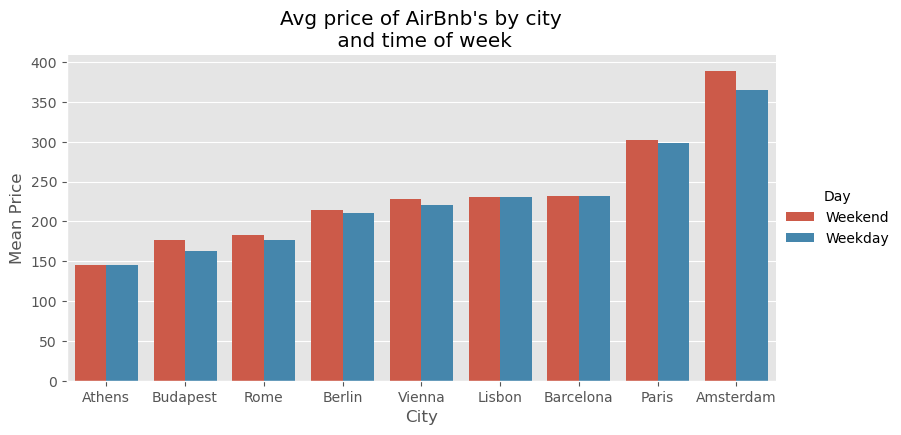

<Figure size 640x480 with 0 Axes>

In [13]:
mean_prices = df.groupby(['City', 'Day'])['Price'].mean().reset_index().sort_values(by='Price')
mean_prices = mean_prices.rename(columns={'Price': 'Mean Price'})
sns.catplot(x='City',y='Mean Price',hue='Day',data=mean_prices,
           height=4, aspect=2,kind='bar')
plt.title('Avg price of AirBnb\'s by city\n and time of week')
plt.show()
plt.clf()

/tmp/ipykernel_20/3922593886.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

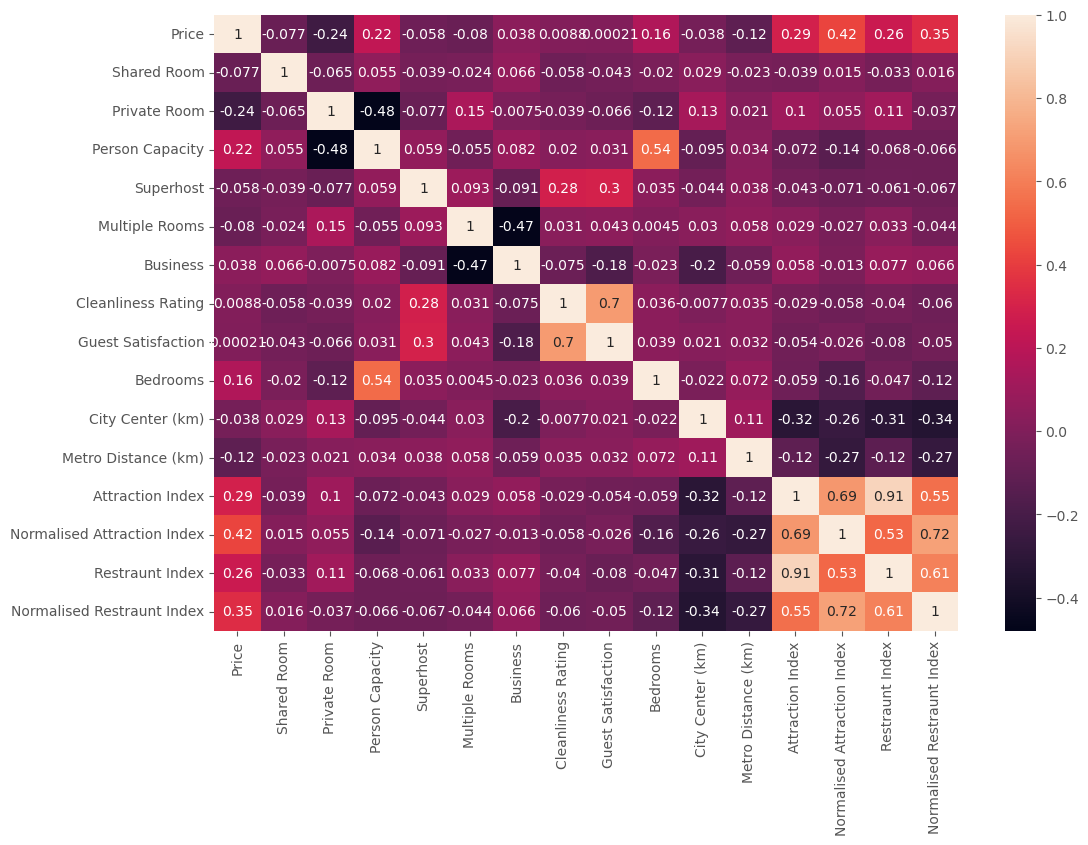

In [14]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True)

In [15]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df.city) 
df.city = le.transform(df.city)

le.fit(df.day) 
df.day = le.transform(df.day)

le.fit(df.room_type) 
df.room_type = le.transform(df.room_type)

le.fit(df.shared_room) 
df.shared_room = le.transform(df.shared_room)

le.fit(df.private_room) 
df.private_room = le.transform(df.private_room)

le.fit(df.superhost) 
df.superhost = le.transform(df.superhost)
df.head()

/tmp/ipykernel_20/521089488.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(', '')
/tmp/ipykernel_20/521089488.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')', '')


,city,price,day,room_type,shared_room,private_room,person_capacity,superhost,multiple_rooms,business,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km,attraction_index,normalised_attraction_index,restraunt_index,normalised_restraunt_index
3,0,433.529398,0,1,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,0,485.552926,0,1,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
6,0,215.124317,0,1,0,1,2.0,0,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
9,0,276.521454,0,1,0,1,2.0,0,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478
13,0,552.808567,0,0,0,0,2.0,1,0,0,10.0,100.0,1,1.305494,1.342162,325.255952,17.222519,390.912052,27.239314


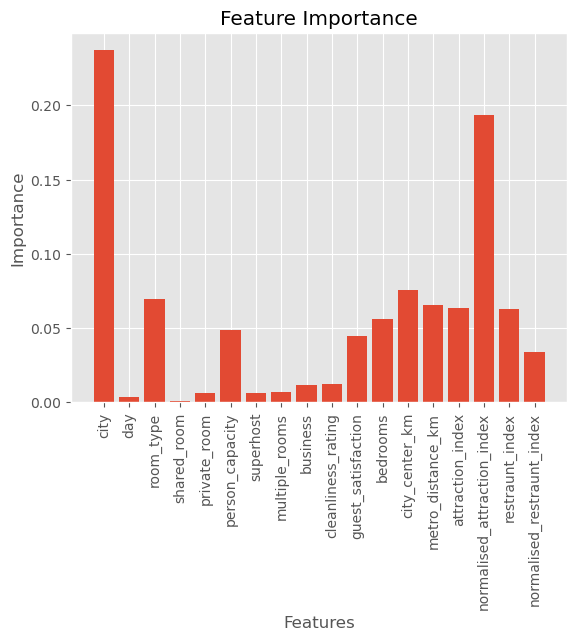

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the feature matrix X and target variable y
X = df.drop('price', axis=1)
y = df['price']

# Train a random forest regressor
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importance scores
feature_importance = rf.feature_importances_

# Visualize feature importances
plt.bar(X.columns, feature_importance)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [17]:
selected_features=['city','normalised_attraction_index','city_center_km','person_capacity','room_type','metro_distance_km','restraunt_index','bedrooms','guest_satisfaction']
selected_data = df[selected_features + ['price']]
from sklearn.model_selection import train_test_split


X = selected_data.drop('price', axis=1)
y = selected_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
percentage_error = mape * 100
print("Mean Absolute Percentage Error (MAPE):", percentage_error)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Percentage Error (MAPE): 15.681921384932046
MSE: 2297.7647570997856
RMSE: 47.9350055502217
MAE: 31.671606582034027
R-squared: 0.7822065528323887


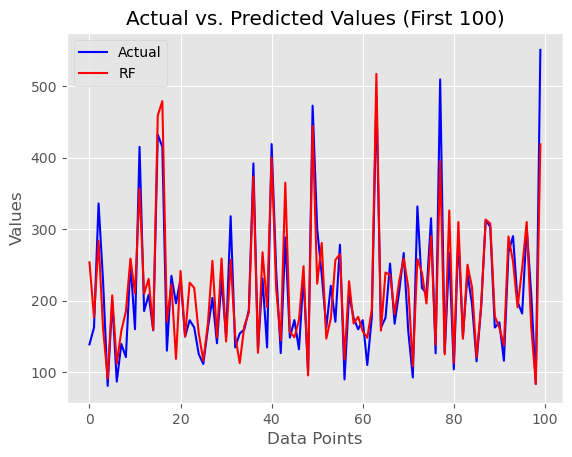

In [19]:
x = np.arange(100)

# Create a line plot for actual values
plt.plot(x, y_test[:100], color='blue', label='Actual')

# Create a line plot for predicted values
plt.plot(x, y_pred[:100], color='red', label='RF')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (First 100)')

plt.legend()
plt.show()

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting stages (default=100)
    learning_rate=0.1,  # Learning rate (default=0.1)
    max_depth=5,  # Maximum depth of each tree (default=3)
    min_samples_split=2,  # Minimum number of samples required to split an internal node (default=2)
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node (default=1)
    subsample=1.0,  # Subsample ratio of the training instances (default=1.0)
    random_state=42  # Random seed for reproducibility (default=None)
)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
percentage_error = mape * 100
print("Mean Absolute Percentage Error (MAPE):", percentage_error)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Percentage Error (MAPE): 22.17401828929886
MSE: 3775.3355857493602
RMSE: 61.44375953462939
MAE: 44.618848734692605
R-squared: 0.6421551210173781


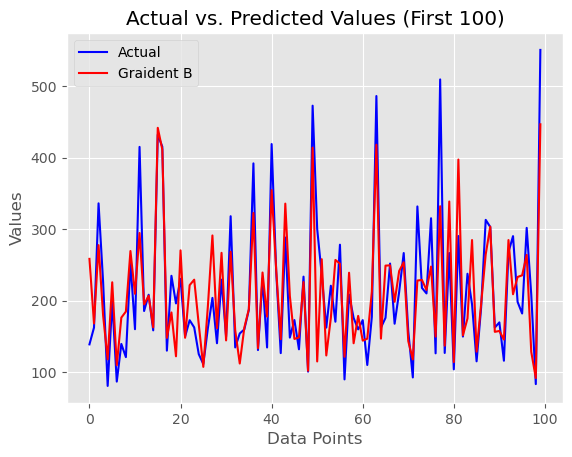

In [21]:
x = np.arange(100)

# Create a line plot for actual values
plt.plot(x, y_test[:100], color='blue', label='Actual')

# Create a line plot for predicted values
plt.plot(x, y_pred[:100], color='red', label='Graident B')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (First 100)')

plt.legend()
plt.show()

In [22]:
import xgboost as xgb
model = xgb.XGBRegressor(
    n_estimators=200,  # Number of boosting rounds (default=100)
    learning_rate=0.01,  # Learning rate (default=0.1)
    max_depth=5,  # Maximum tree depth (default=3)
    random_state=42  # Random seed for reproducibility (default=None)
)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
percentage_error = mape * 100
print("Mean Absolute Percentage Error (MAPE):", percentage_error)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Percentage Error (MAPE): 21.924746131180026
MSE: 5616.831969957314
RMSE: 74.94552668410113
MAE: 50.663408637570654
R-squared: 0.46760903477242965


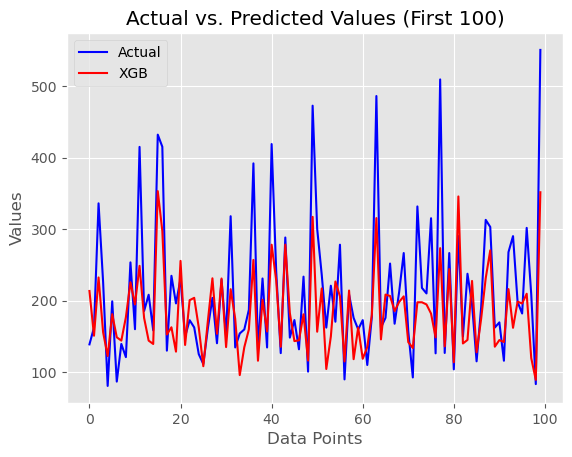

In [23]:
x = np.arange(100)

# Create a line plot for actual values
plt.plot(x, y_test[:100], color='blue', label='Actual')

# Create a line plot for predicted values
plt.plot(x, y_pred[:100], color='red', label='XGB')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (First 100)')

plt.legend()
plt.show()

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Instantiate the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=7, min_samples_split=10, min_samples_leaf=7,max_features= 1.0)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
ape = np.abs((y_test - y_pred) / y_test)
mape = np.mean(ape) * 100

# Print the evaluation results
print("R-squared score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared score: 0.553979698039269
Mean Squared Error: 4705.604067176821
Root Mean Squared Error: 68.59740568838461
Mean Absolute Error: 49.64264608762856
Mean Absolute Percentage Error (MAPE): 24.672582455920416


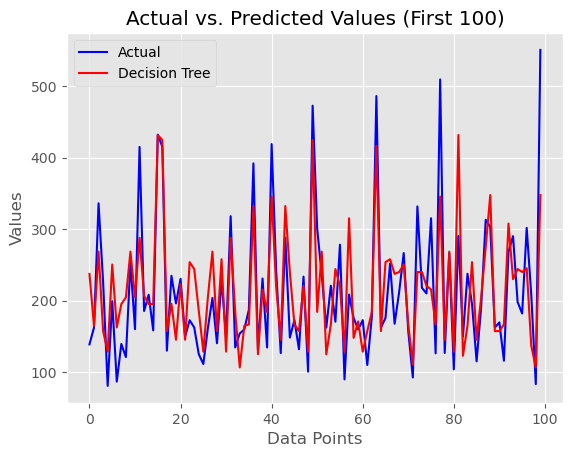

In [25]:
x = np.arange(100)

# Create a line plot for actual values
plt.plot(x, y_test[:100], color='blue', label='Actual')

# Create a line plot for predicted values
plt.plot(x, y_pred[:100], color='red', label='Decision Tree')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (First 100)')

plt.legend()
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the KNN model with specified parameters
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance', p=1, algorithm='ball_tree')
# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
ape = np.abs((y_test - y_pred) / y_test)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(ape) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the evaluation results
print("R-squared score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared score: 0.705591310325451
Mean Squared Error: 3106.071004962301
Mean Absolute Error: 30.686885353686073
Mean Absolute Percentage Error (MAPE): 14.8409998081682
Root Mean Squared Error (RMSE): 55.732136195935475


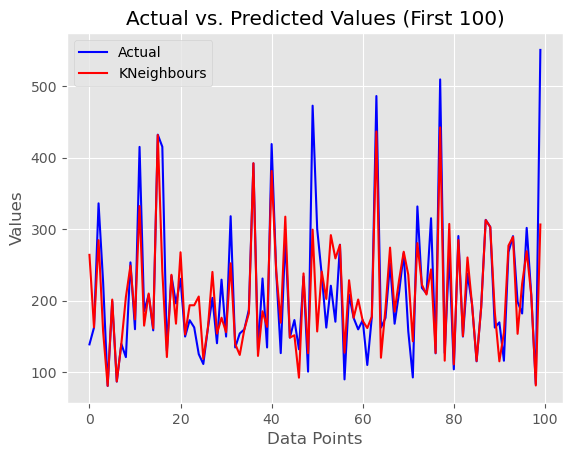

In [27]:
x = np.arange(100)

# Create a line plot for actual values
plt.plot(x, y_test[:100], color='blue', label='Actual')

# Create a line plot for predicted values
plt.plot(x, y_pred[:100], color='red', label='KNeighbours')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (First 100)')

plt.legend()
plt.show()

In [28]:
from sklearn.svm import SVR
model = SVR(
    kernel='rbf',  # Radial basis function kernel (default='rbf')
    C=1.0,  # Penalty parameter C of the error term (default=1.0)
    epsilon=0.1  # Epsilon in the epsilon-SVR model (default=0.1)
)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
percentage_error = mape * 100
print("Mean Absolute Percentage Error (MAPE):", percentage_error)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Percentage Error (MAPE): 36.62668578344213
MSE: 10416.097609637063
RMSE: 102.05928477917658
MAE: 74.73163773233422
R-squared: 0.012711028216603748


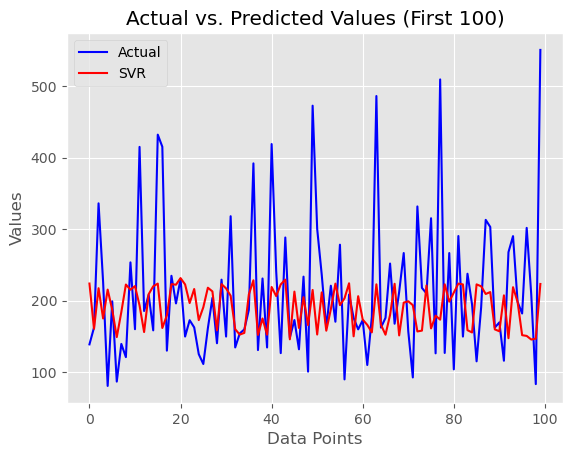

In [29]:
x = np.arange(100)

# Create a line plot for actual values
plt.plot(x, y_test[:100], color='blue', label='Actual')

# Create a line plot for predicted values
plt.plot(x, y_pred[:100], color='red', label='SVR')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (First 100)')

plt.legend()
plt.show()